<a href="https://colab.research.google.com/github/berbonilla/CCMACLRL_PROJECT_COM221/blob/main/Sentiment_Analysis_for_Online_Shopping_Product_Review_using_Multimodal_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis for Online Shopping Product Review using Naive Bayes

In [10]:
# Sentiment Analysis for Online Shopping Product Review using Naive Bayes
import pandas as pd
import nltk
import spacy
import seaborn as sns
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#data = pd.read_csv('Small_dataset.csv')
data = pd.read_csv('Large_dataset.csv')
#data = pd.read_csv('https://datafiniti.linked.data.world/d/consumer-reviews-of-amazon-products/file/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', sep='\t')


In [11]:
data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [12]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))
        extra_stop_words = {
            'product', 'one', 'would', 'really', 'like', 'get', 'also', 'even', 'could',
            'buy', 'item', 'use', 'using', 'find', 'make', 'order', 'see', 'time', 'since',
            'way', 'thing', 'lot', 'know', 'want', 'bit', 'give', 'first', 'still', 'go',
            'going', 'need', 'might', 'sure', 'though',
            'got', 'however', 'seems', 'overall', 'back', 'try', 'trying', 'expected',
            'last', 'looking', 'hope', 'felt', 'decided', 'made', 'worked', 'new',
            'almost', 'definitely', 'enough', 'using', 'place', 'every', 'long',
            'said', 'day', 'little', 'part', 'actually', 'came', 'without', 'feel',
            'looked', 'another', 'kept', 'always', 'small', 'already', 'help',
            'wanted', 'worth', 'thing', 'perfect', 'different'
        }

        stop_words.update(extra_stop_words)
        cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
        return ' '.join(cleaned_tokens)
    else:
        return ''

# Drop unnecessary columns
data = data[['reviews.rating', 'reviews.text', 'reviews.title']]

# Remove rows with NaN or null values
data = data.dropna()

# Remove rows with non-numeric values in 'reviews.rating'
data = data[pd.to_numeric(data['reviews.rating'], errors='coerce').notnull()]
data['reviews.rating'] = pd.to_numeric(data['reviews.rating'])

# Create a new rating system (1 for good, 0 for bad)
data['label'] = (data['reviews.rating'] > 3).astype(int)

# Clean the 'reviews.text' column
data['cleaned_text'] = data['reviews.text'].apply(preprocess_text)

# Remove the old 'reviews.rating' column
data = data.drop('reviews.rating', axis=1)
data = data.drop('reviews.title', axis=1)
data = data.drop('reviews.text', axis=1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         28332 non-null  int64 
 1   cleaned_text  28332 non-null  object
dtypes: int64(1), object(1)
memory usage: 442.8+ KB


In [14]:
negative_words = {
    "bad", "terrible", "awful", "horrible", "worst", "poor", "disappointing", "broken",
    "defective", "cheap", "junk", "waste", "useless", "damaged", "fraud", "scam",
    "fake", "inferior", "low-quality", "not working", "doesn't work", "disgusted",
    "angry", "upset", "unhappy", "complaint", "issue", "problem", "unsatisfied",
    "return", "refund", "rip-off", "nightmare", "regret", "hate", "disappointed",
    "garbage", "crap", "lousy", "shoddy", "subpar", "fraudulent", "deceptive",
    "misleading", "unacceptable", "inferior", "underwhelming", "disgusting", "terrible quality",
    "unreliable", "cheaply made", "overpriced", "dissatisfied", "flimsy", "worthless",
    "unusable", "not as advertised", "false advertising", "broke", "malfunction",
    "overhyped", "exaggerated", "false claims", "doesn't last", "fails", "fall apart",
    "low standards", "ripped off", "glitchy", "crashes", "lagging", "outdated",
    "poor performance", "unresponsive", "highly disappointing", "substandard", "worn out",
    "ineffective", "incompetent", "subpar quality", "doesn't meet expectations", "horrific",
    "troublesome", "shameful", "embarrassing", "pathetic", "dreadful", "abysmal",
    "displeased", "nonfunctional", "not durable", "easily breaks",
    "questionable", "untrustworthy", "undependable", "falls short", "flawed", "mediocre",
    "regrettable", "overrated", "disparaging", "not reliable", "not satisfactory",
    "unfit", "failing", "disgraceful", "disparaging", "unpleasant", "exasperating",
    "a letdown", "painful", "stressful", "tedious", "inadequate", "lackluster",
    "suboptimal", "inferior quality", "inconsistent", "discreditable", "pathetic quality",
    "out of order", "hastily made", "poorly designed", "low value", "suboptimal experience",
    "awkward", "dismal", "janky", "concerning", "screwy", "troublesome", "irritating",
    "unfathomable", "nonviable", "discomforting", "overcomplicated", "restrictive",
    "unsatisfactory", "inferior service", "disrespectful", "poor service", "uninviting",
    "confusing", "shabby", "unremarkable", "lack of functionality", "inoperable",
    "outdated technology", "unwanted", "dysfunctional", "uninviting", "a burden",
    "pathetic excuse", "laughable", "overly complicated", "bad design", "horrendous",
    "confounding", "not worth it", "unproductive", "stupid", "cringeworthy",
    "unserviceable", "untrustworthy", "unreliable", "inaccurate", "not worth the price",
    "poor quality control", "chaotic", "inconsiderate", "unreliable delivery",
    "overblown", "unacceptable", "bland", "lack of support", "exhausting",
    "annoying", "disheartening", "unresponsive customer service", "outdated features",
    "fails to deliver", "tacky", "deficient", "problems galore", "unpleasant experience",
    "lack of clarity", "substandard materials", "overly hyped", "garish",
    "underwhelming performance", "disheartened", "clunky", "poorly executed",
    "confusing interface", "poorly thought out", "not convenient", "hopeless",
    "mind-numbing", "convoluted", "nonsensical", "suffocating", "unbearable",
    "draining", "embarrassing experience", "horrible design", "irritable",
    "unsightly", "downright awful", "unappetizing", "uninteresting", "excessive",
    "infuriating", "subpar experience", "unacceptable behavior", "negligent",
    "untrustworthy warranty", "unstable", "undesirable", "misguided", "absurd",
    "pointless", "ridiculous", "exceedingly poor", "lack of options", "poorly manufactured",
    "lame", "unnecessary", "ridiculous pricing", "pathetic service", "crummy",
    "hopeless design", "unacceptable quality", "backwards", "dreadfully ineffective",
    "anomaly", "miserable", "obnoxious", "toxic", "unpleasant odor", "irremediable",
    "inferior experience", "disparate", "mediocre performance", "ridiculous functionality",
    "lack of coherence", "worthless effort", "untrustworthy information", "grating",
    "debilitating", "unfit for purpose", "absurdly bad", "mind-bogglingly poor",
    "disproportionate", "not recommended", "bewildering", "frustrating experience",
    "overly ambitious", "substandard execution", "vague", "unexplained", "trivial",
    "counterproductive", "lack of detail", "inconsistent performance", "irresolute",
    "fucking", "shit", "bullshit", "bastard", "cunt", "asshole", "dick", "piss",
    "damn", "hell", "fucked", "crappy", "shitstorm", "motherfucker", "sucky",
    "piece of shit", "cocksucker", "fucking awful", "waste of shit", "piss-poor",
    "screwed", "fuck this", "damn near useless", "shitty product", "waste of time",
    "utterly shitty", "bullshit product", "fuck up", "pissed off", "fucking ridiculous"
}


def calculate_negativity_score(text):
    if isinstance(text, str):
        tokens = word_tokenize(text.lower())
        negative_word_count = sum(1 for token in tokens if token in negative_words)
        return negative_word_count / len(tokens) if len(tokens) > 0 else 0
    else:
        return 0

# Load the English NLP model for dependency parsing
nlp = spacy.load("en_core_web_sm")

def detect_sarcasm(text):
    sarcastic_phrases = ["not bad", "not terrible", "yeah right", "sure thing", "big deal", "thanks a lot"]
    positive_with_negation = ["good", "great", "amazing", "fantastic", "beautiful"]

    # Check for common sarcastic phrases
    for phrase in sarcastic_phrases:
        if phrase in text.lower():
            return True

    # Dependency parsing to find negation + positive adjective patterns
    doc = nlp(text.lower())
    for token in doc:
        if token.dep_ == "neg" and token.head.lemma_ in positive_with_negation:
            return True

    # Sentiment analysis: look for mixed positive and negative sentiment
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Slightly positive or negative sentiments in sarcastic context
    if -0.3 < polarity < 0.3:
        positive_count = sum(1 for word in doc if word.sentiment > 0)
        negative_count = sum(1 for word in doc if word.sentiment < 0)

        if positive_count > 0 and negative_count > 0:
            return True

    return False

# Apply the negativity score calculation to the cleaned_text
data['negativity_score'] = data['cleaned_text'].apply(calculate_negativity_score)
data['sarcasm_detected'] = data['cleaned_text'].apply(detect_sarcasm)

# Iterate through the DataFrame and change label based on negativity score and sarcasm
for index, row in data.iterrows():
    if row['negativity_score'] > 0.005 or detect_sarcasm(row['cleaned_text']):
        data.at[index, 'label'] = 0



In [15]:
data.head()

,label,cleaned_text,negativity_score,sarcasm_detected
0,0,3 bad quality missing backup spring put pc alu...,0.090909,False
1,1,bulk le expensive product,0.000000,False
2,1,well duracell price happy,0.000000,False
3,1,seem work well name brand battery much better ...,0.000000,False
4,1,battery lasting price great,0.000000,False


In [16]:
data = data.drop(['negativity_score'], axis=1)
data = data.drop(['sarcasm_detected'], axis=1)

In [17]:
df_train, df_temp = train_test_split(data, test_size=0.5, random_state=24)
df_validation, df_test = train_test_split(df_temp, test_size=0.5, random_state=5)

In [18]:
# Vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(df_train['cleaned_text'])
y_train = df_train['label']

X_validation = vectorizer.transform(df_validation['cleaned_text'])
y_validation = df_validation['label']

X_test = vectorizer.transform(df_test['cleaned_text'])
y_test = df_test['label']

In [19]:
df_validation.head()

,label,cleaned_text
7296,0,well longer ask battery move device cheap work...
4756,1,great value battery gone bought planning ahead...
12561,1,work great plan arm reach physically tap ask a...
26927,1,bought 11 year old son absolutely love
10075,1,work great


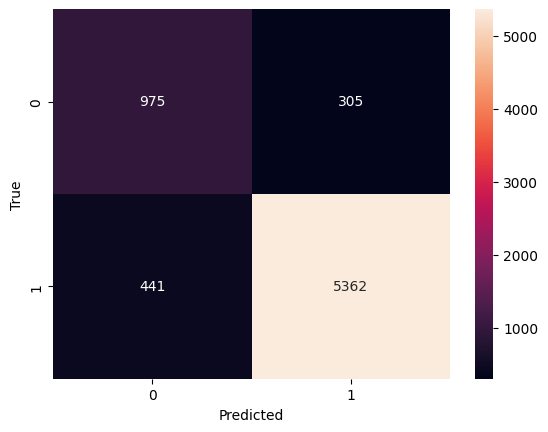

In [20]:
from sklearn.metrics import confusion_matrix

model = MultinomialNB(class_prior=[0.2, 0.2])
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_validation = model.predict(X_validation)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

y_true = y_validation
y_pred = y_pred_validation

cm = confusion_matrix(y_true, y_pred)

import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# prompt: create a confusion matrix using print

cm

array([[ 975,  305],
       [ 441, 5362]])

In [21]:
# Validation
y_pred_val = model.predict(X_validation)
print("Validation Accuracy: ", accuracy_score(y_validation, y_pred_val))

Validation Accuracy:  0.8946773965833686


In [22]:
# Test
y_pred_test = model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.8825356487364111


In [27]:
new_text = pd.Series("I was excited to try this device, but I found it hard to navigate, and it sometimes lagged, causing me to lose progress. The features sounded promising, but overall, it didn’t quite meet my expectations. Hoping future updates improve the experience")
new_text_transform = vectorizer.transform(new_text)
prediction = model.predict(new_text_transform)

# Interpret the prediction result
if prediction == 1:
    print("Positive Review")
else:
    print("Negative Review")

Negative Review
